In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from joblib import dump, load
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/BTL_KPDLL_7/Real_estate_valuation_data_set.xlsx')
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


# Check out the data

In [ ]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [ ]:
df.shape

(414, 8)

In [ ]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
# Tìm các giá trị nhà bị âm
negative_price_indices = df[df['Y house price of unit area'] < 0].index
# In ra các giá trị bị âm
print("Các giá trị nhà bị âm:")
print(df.loc[negative_price_indices, ['Y house price of unit area']])

Các giá trị nhà bị âm:
Empty DataFrame
Columns: [Y house price of unit area]
Index: []


Không có giá trị âm nào ở cột 'Y house price of unit area'

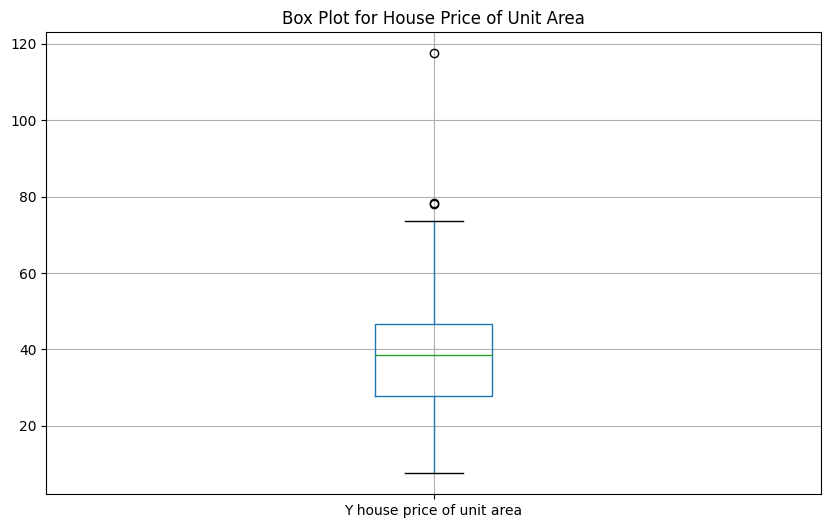

Các giá trị ngoại lai:
220     78.3
270    117.5
312     78.0
Name: Y house price of unit area, dtype: float64


In [ ]:
#Tạo Box Plot để trực quan hóa các giá trị ngoại lai
plt.figure(figsize=(10, 6))
df.boxplot(column=['Y house price of unit area'])
plt.title('Box Plot for House Price of Unit Area')
plt.show()

# Xác định các giá trị ngoại lai sử dụng phạm vi interquartile (IQR)
def find_outliers_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR  #Việc sử dụng hệ số 1.5 là một tiêu chuẩn phổ biến trong việc xác định các giá trị ngoại lai.
    upper_bound = Q3 + 1.5 * IQR
    return df[(df < lower_bound) | (df > upper_bound)]

outliers = find_outliers_IQR(df['Y house price of unit area'])
print("Các giá trị ngoại lai:")
print(outliers)


In [ ]:
# Thay thế các giá trị ngoại lai bằng giá trị trung bình của cột
mean_value = df['Y house price of unit area'].mean()
df.loc[outliers.index, 'Y house price of unit area'] = mean_value

In [ ]:
# Chuẩn hóa dữ liệu
# Min-Max Scaling
scaler = MinMaxScaler()
df[['X1 transaction date',	'X2 house age',	'X3 distance to the nearest MRT station']] = scaler.fit_transform(df[
                                                                                                ['X1 transaction date',	'X2 house age',	'X3 distance to the nearest MRT station']])

**Chuẩn Hóa Dữ Liệu:** Đầu tiên, bạn chuẩn hóa các biến để chúng có cùng thang đo, điều này sẽ giúp mô hình học nhanh hơn và tránh việc các biến lớn chi phối mô hình.
**Biến Đổi Không Tuyến Tính:** Tiếp theo, nhận thấy rằng giá nhà phân phối lệch phải. Bạn áp dụng biến đổi logarit để làm giảm độ lệch và làm cho dữ liệu phân phối gần chuẩn hơn.

#### Kiểm tra và loại bỏ đa cộng tuyến

In [ ]:
# Chọn các biến độc lập để kiểm tra đa cộng tuyến
X = df[['X1 transaction date','X2 house age','X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]

# Tính toán VIF cho từng biến số
vif_df = pd.DataFrame()
vif_df['feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF của các biến số:")
print(vif_df)
# Một bảng hiển thị VIF (hệ số phóng đại phương sai) cho từng biến số, giúp xác định mức độ đa cộng tuyến giữa các biến.

VIF của các biến số:
                                  feature           VIF
0                     X1 transaction date  3.982447e+00
1                            X2 house age  3.470895e+00
2  X3 distance to the nearest MRT station  2.946550e+00
3         X4 number of convenience stores  4.742453e+00
4                             X5 latitude  5.946057e+06
5                            X6 longitude  5.945190e+06


<Axes: >

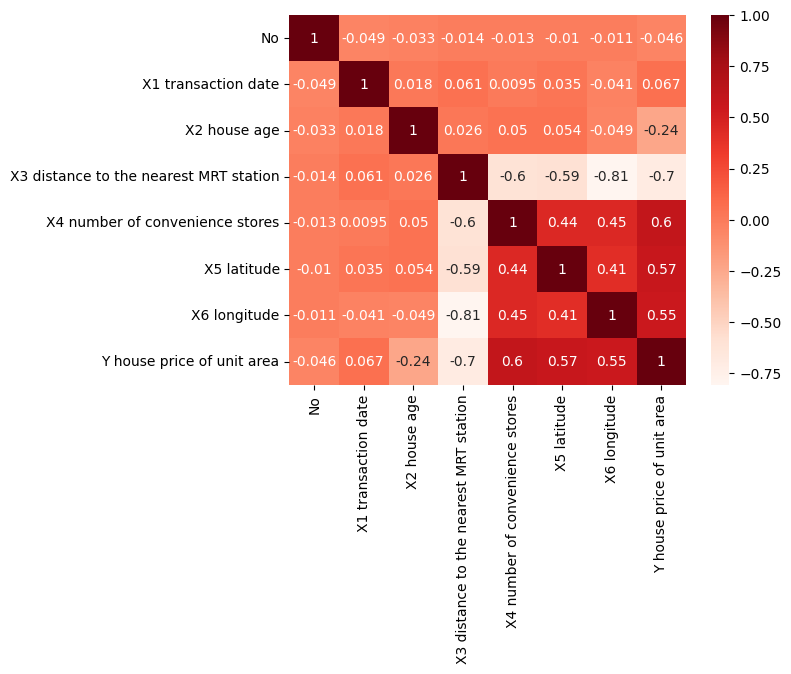

In [ ]:
# Kiểm tra ma trận tương quan
sns.heatmap(df.corr(), annot=True,cmap='Reds')

#Một ma trận hiển thị hệ số tương quan giữa các biến, giúp kiểm tra mối quan hệ tương quan giữa các biến độc lập.

In [ ]:
# Kiểm tra lại dữ liệu sau khi biến đổi
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,0.272727,0.730594,0.009513,10,24.98298,121.54024,37.9
1,2,0.272727,0.445205,0.043809,9,24.98034,121.53951,42.2
2,3,1.000000,0.303653,0.083315,5,24.98746,121.54391,47.3
3,4,0.909091,0.303653,0.083315,5,24.98746,121.54391,54.8
4,5,0.181818,0.114155,0.056799,5,24.97937,121.54245,43.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


# EDA

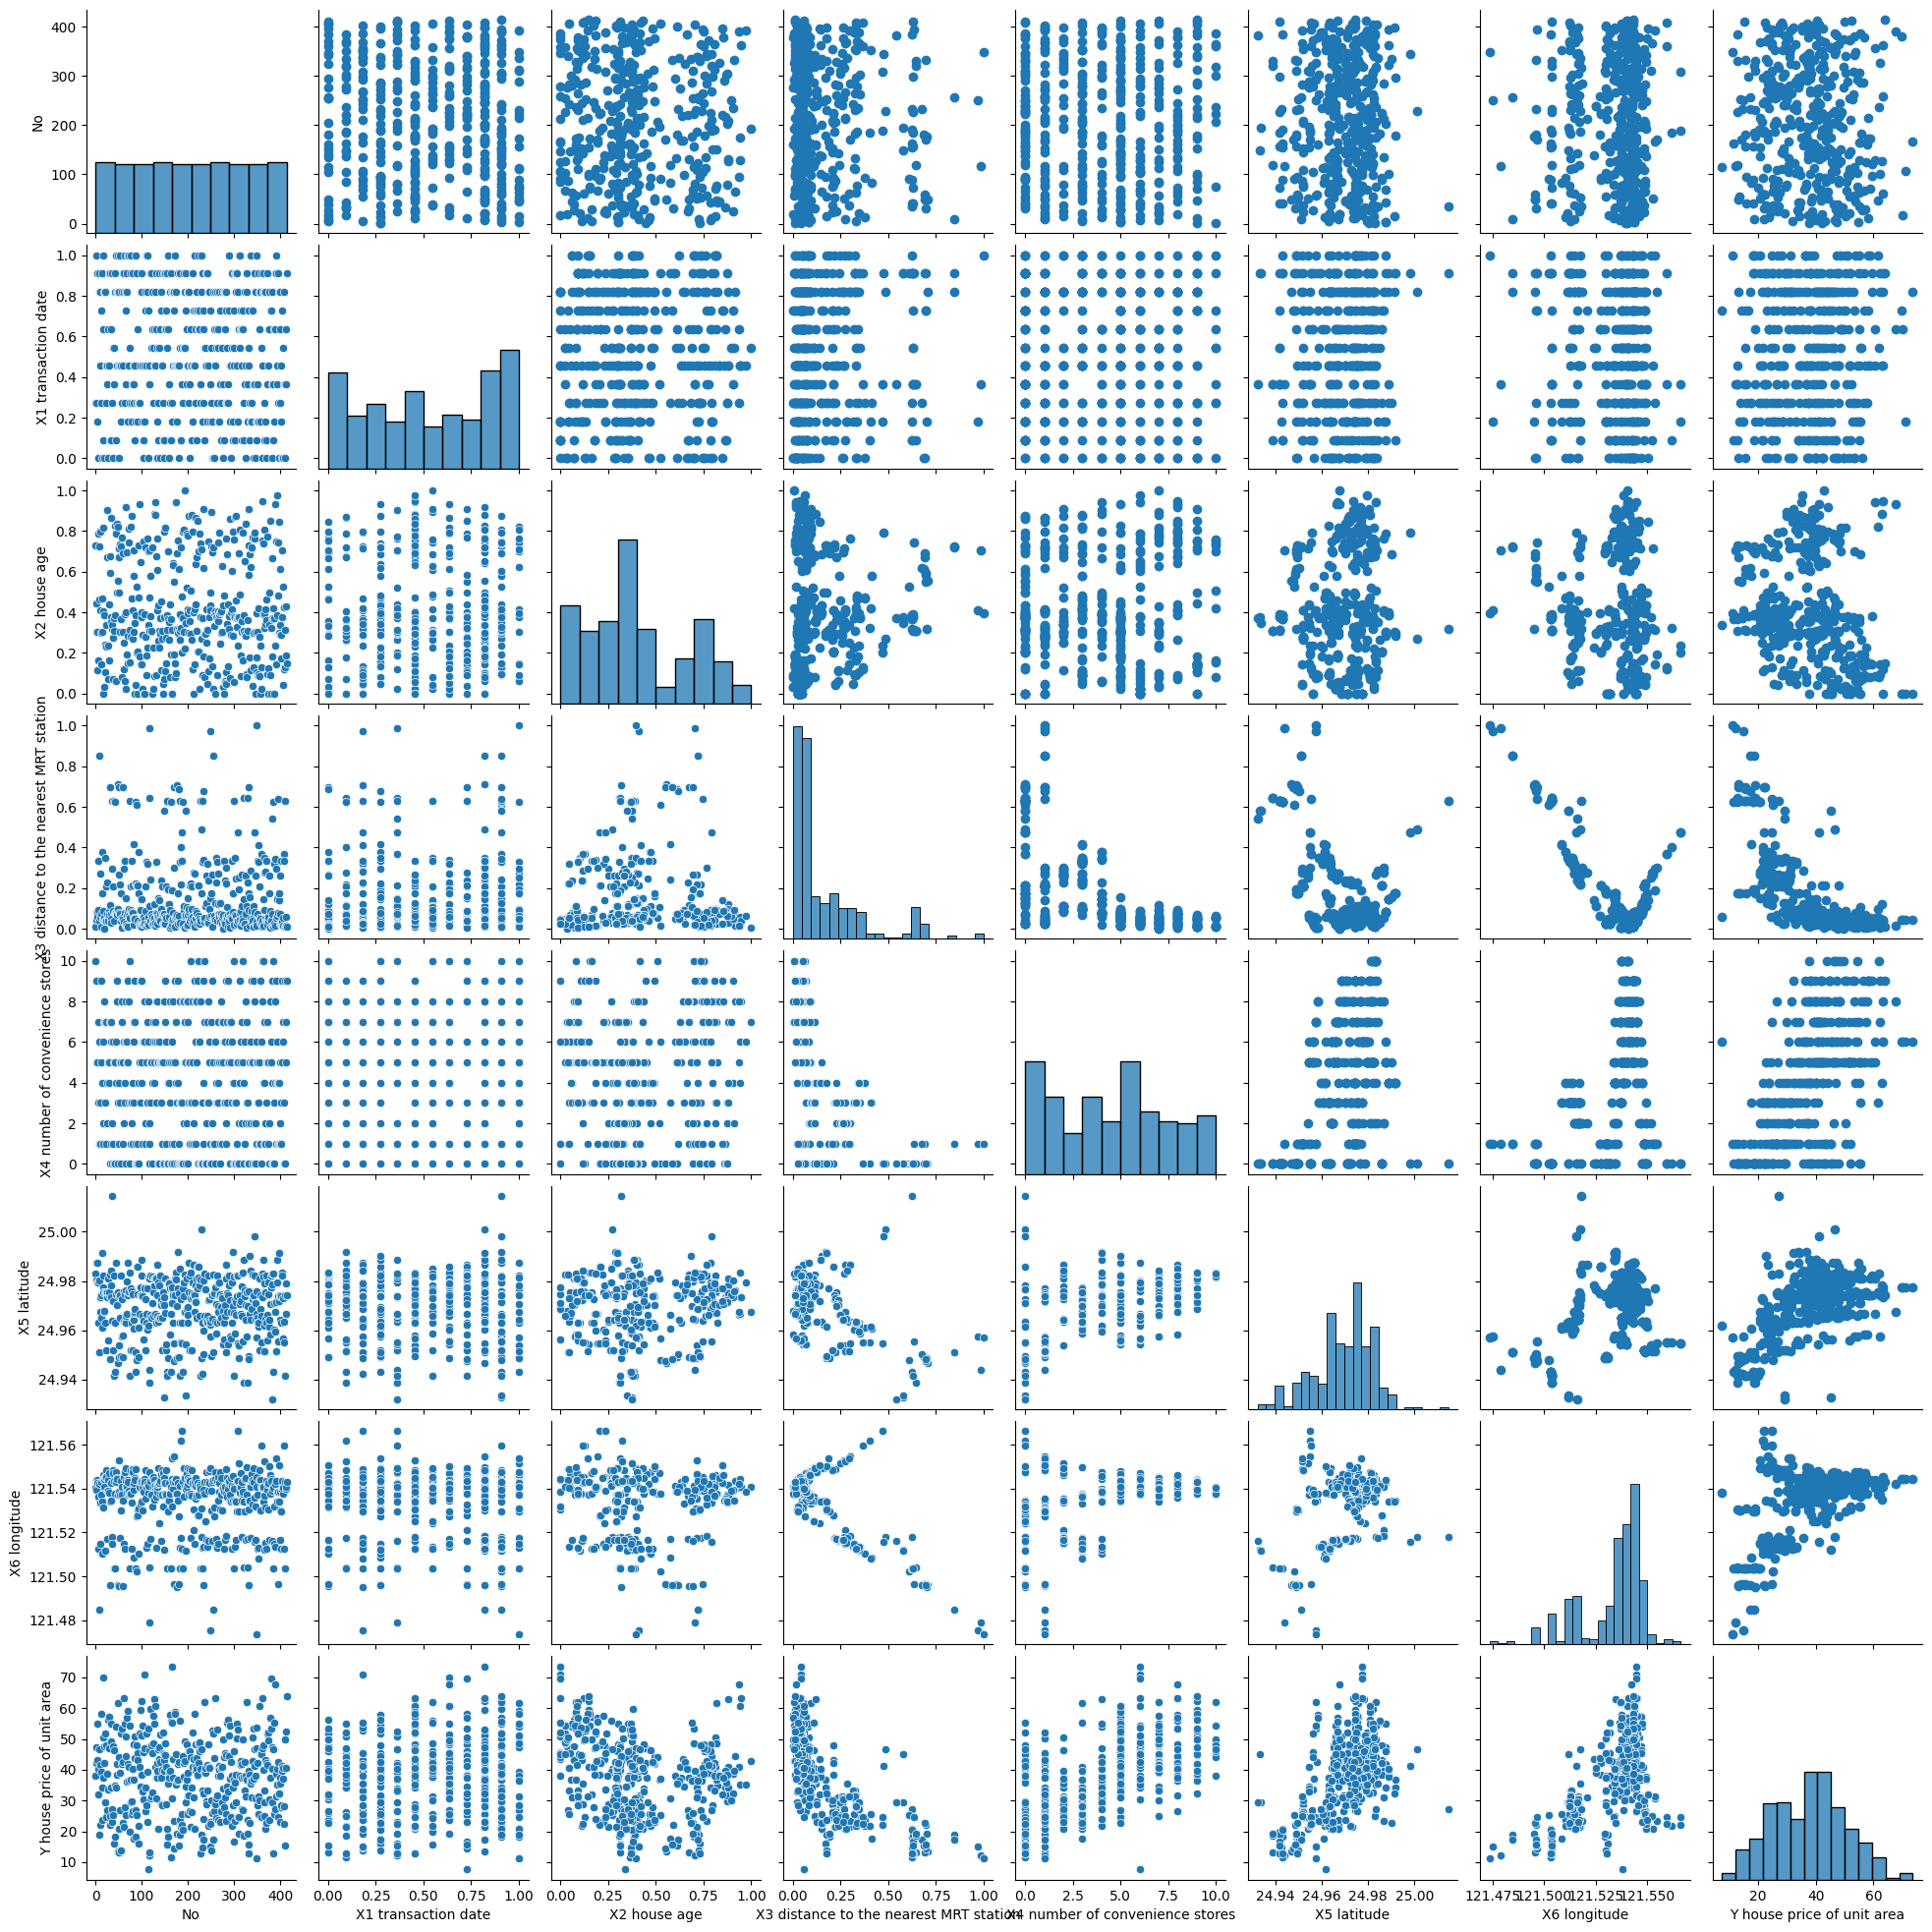

In [ ]:
g= sns.pairplot(df)
g.map_upper(plt.scatter)

<Axes: >

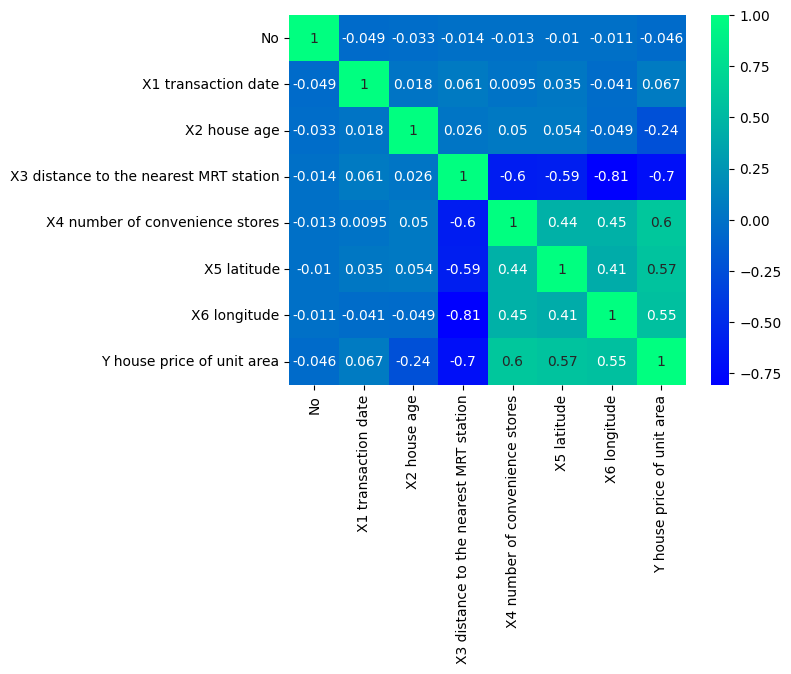

In [ ]:
# tìm mối tương quan theo cặp của tất cả các cột trong khung dữ liệu.
df.corr()
#Heatmap cho mối tương quan
sns.heatmap(df.corr(), annot=True,cmap='winter')

Text(0.5, 9.444444444444438, 'house price of unit area')

<Figure size 1000x400 with 0 Axes>

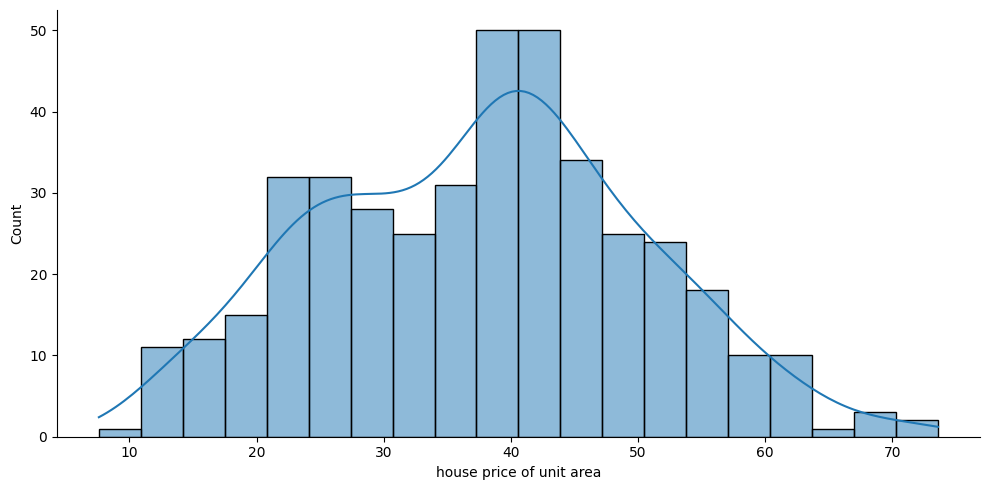

In [ ]:
plt.figure(figsize=(10,4))
sns.displot(df['Y house price of unit area'],kde=True,bins=20, aspect=2)
plt.xlabel('house price of unit area')

<Axes: xlabel='Y house price of unit area'>

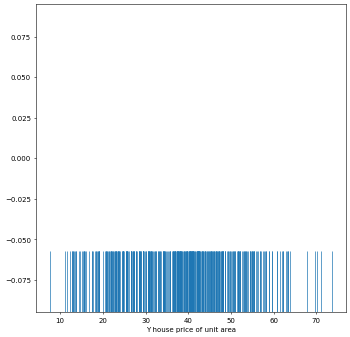

In [ ]:
plt.figure(figsize=(8, 8), dpi=50)

sns.rugplot(df['Y house price of unit area'], height=0.2)

<Axes: xlabel='X1 transaction date', ylabel='Y house price of unit area'>

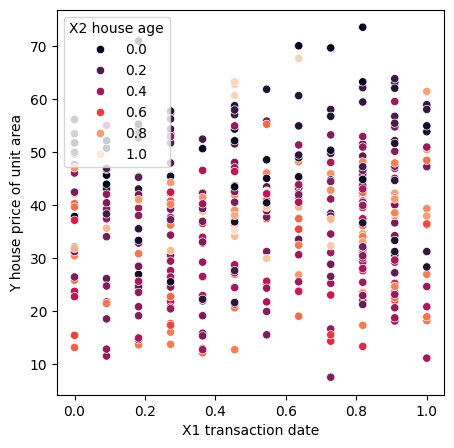

In [ ]:
plt.figure(figsize=(5, 5), dpi=100)

sns.scatterplot(data=df, y=df['Y house price of unit area'], x=df['X1 transaction date'] , hue= 'X2 house age', palette="rocket")


<Axes: xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

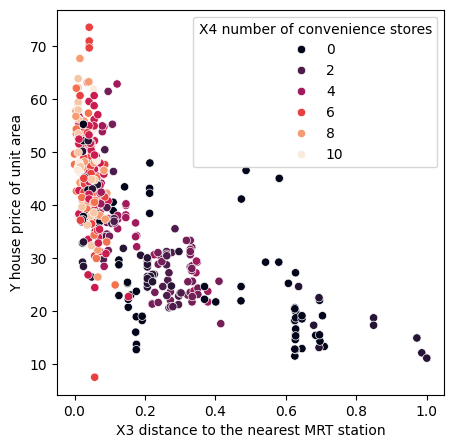

In [ ]:
plt.figure(figsize=(5, 5), dpi=100)

sns.scatterplot(data=df, y=df['Y house price of unit area'], x=df['X3 distance to the nearest MRT station'] , hue= 'X4 number of convenience stores', palette="rocket")

<Axes: xlabel='X5 latitude', ylabel='Y house price of unit area'>

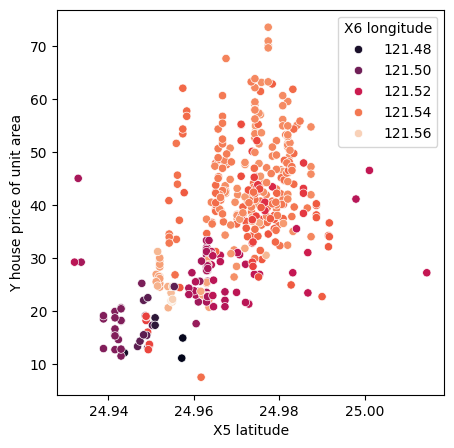

In [ ]:
plt.figure(figsize=(5, 5), dpi=100)

sns.scatterplot(data=df, y=df['Y house price of unit area'], x=df['X5 latitude'] , hue= 'X6 longitude', palette="rocket")

# Huấn luyện mô hình hồi quy tuyến tính

<p>Đầu tiên <b>tách</b> dữ liệu thành một mảng X chứa <b>các tính năng</b> để huấn luyện và một mảng y có biến <b>mục tiêu</b>, trong trường hợp này là cột (Y giá nhà đơn vị diện tích).<p>

In [ ]:
X = df.drop(['No','Y house price of unit area'],axis=1)
y = df['Y house price of unit area']


In [ ]:
print("X=",X.shape,"\ny=", y.shape)

X= (414, 6) 
y= (414,)


In [ ]:
X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,0.272727,0.730594,0.009513,10,24.98298,121.54024
1,0.272727,0.445205,0.043809,9,24.98034,121.53951
2,1.000000,0.303653,0.083315,5,24.98746,121.54391
3,0.909091,0.303653,0.083315,5,24.98746,121.54391
4,0.181818,0.114155,0.056799,5,24.97937,121.54245


In [ ]:
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

<p><b>Chia</b> dữ liệu thành <b>huấn luyện</b> và <b>kiểm tra</b></p>

In [ ]:
# huấn luyện mô hình trên tập huấn luyện và sau đó sử dụng tập kiểm tra để đánh giá mô hình.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,random_state = 101)

<h3>Mô hình huấn luyện</h3>

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

<H3>Hồi quy</H3>

In [ ]:
#hệ số của mô hình hồi quy tuyến tính
lin_reg.coef_

pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coedicients'])

,Coedicients
X1 transaction date,2.737026
X2 house age,-13.241133
X3 distance to the nearest MRT station,-21.234096
X4 number of convenience stores,1.225590
X5 latitude,246.644909
X6 longitude,74.066053


<h3>Dự đoán dữ liệu thử nghiệm</h3>

In [ ]:
y_pred = lin_reg.predict(X_test)

In [ ]:
y_pred

array([13.73386886, 10.35917242, 26.46519611, 47.31183641, 33.24391962,
       36.95042927, 35.92967471, 40.15042756, 46.73434852, 39.3050233 ,
       44.02373391, 32.89877017, 38.55007738, 37.56103406, 44.08585276,
       46.29617906, 37.32308698, 44.44401855, 48.83969403, 46.59881648,
       40.00645009, 53.6042912 , 47.18083844, 35.97687655, 31.73573401,
       48.61238319, 39.16711926, 48.64775569, 45.49956521, 38.38736021,
       48.93519876, 40.48924747, 43.75591548, 43.97038192, 45.6856406 ,
        8.08410647, 36.75599346, 38.82015828,  8.27246511, 55.03984314,
       31.75655979, 47.95601567, 23.48170354, 47.32863697, 41.1032198 ,
       50.22615709, 40.74815438, 36.15367831, 43.53766183, 35.12362895,
       46.66975267, 34.47421148, 42.29842649, 15.36701377, 37.4071631 ,
       48.2075058 , 43.22895353, 44.99441854, 44.16255839, 40.29797118,
       32.14221629, 43.10690934, 41.39383683, 42.38759824, 53.14995143,
       43.15688035, 25.29013345, 47.3740133 , 30.41932925, 39.39

In [ ]:
from sklearn.metrics import r2_score
y_pred=lin_reg.predict(X_test)
print("R2 score of model: {}".format(r2_score(y_test,y_pred)))

R2 score of model: 0.6490287547842084


R² Cao: Với R² gần bằng 1, mô hình hồi quy tuyến tính đang làm rất tốt việc giải thích sự biến thiên của biến phụ thuộc. Điều này cho thấy mô hình có độ chính xác cao và phù hợp với dữ liệu.

<h3>Chỉ số đánh giá hồi quy</h3>
<ul><b>
    <li>1-MeanAbsolute Error.</li>
    <li>2-Mean Squared Error.</li>
    <li>3-R^2</li>
   </b>
  </ul>

## ✔️ Số liệu đánh giá hồi quy

Dưới đây là ba số liệu đánh giá phổ biến cho các vấn đề hồi quy:
> - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> 📌 So sánh các số liệu này:
- **MAE** là dễ hiểu nhất vì đó là lỗi trung bình.
- **MSE** phổ biến hơn MAE, vì MSE "trừng phạt" các lỗi lớn hơn, có xu hướng hữu ích trong thế giới thực.
- **RMSE** thậm chí còn phổ biến hơn MSE vì RMSE có thể hiểu được theo đơn vị "y".

> Tất cả những thứ này đều là **hàm mất mát**, vì chúng tôi muốn giảm thiểu chúng.

In [ ]:
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE,MSE,RMSE],index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,5.334487
MSE,46.460281
RMSE,6.816178


In [ ]:
df['Y house price of unit area'] .mean()

37.594059371280544

<h3>Các lô đất còn lại</h3>

In [ ]:
#Giá trị dư
test_residuals=y_test - y_pred

Text(0, 0.5, 'Y-Pred')

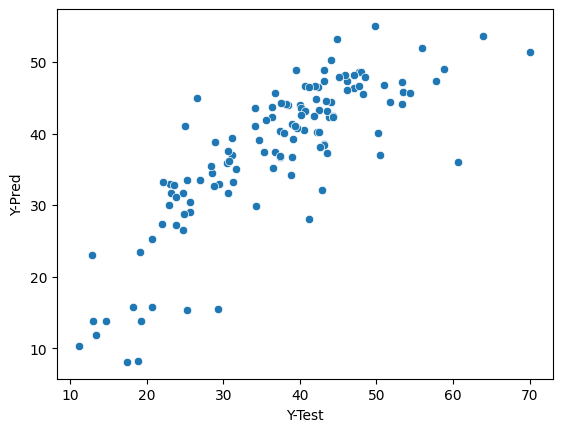

In [ ]:
# biểu đồ phân tán để biểu diễn mối quan hệ giữa giá trị thực tế (y_test) và giá trị dự đoán (y_pred). Cụ thể:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y-Test')
plt.ylabel('Y-Pred')

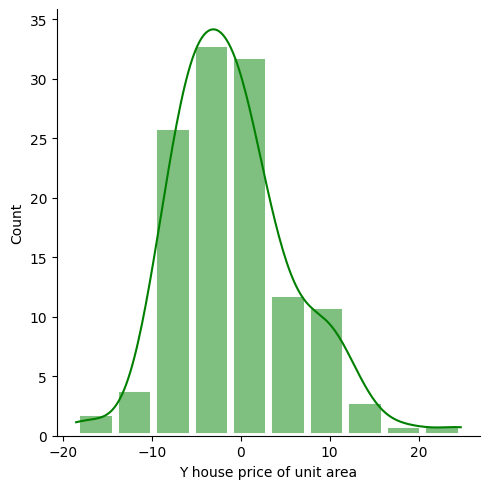

In [ ]:
#Biểu đồ phân phối phần dư
#Biểu đồ này hiển thị số lượng phần dư nằm trong mỗi khoảng giá trị và
#đường cong KDE mô tả phân phối xác suất của các phần dư.
sns.displot(test_residuals, bins=10, kde=True ,color='g', edgecolor='white', linewidth=5)


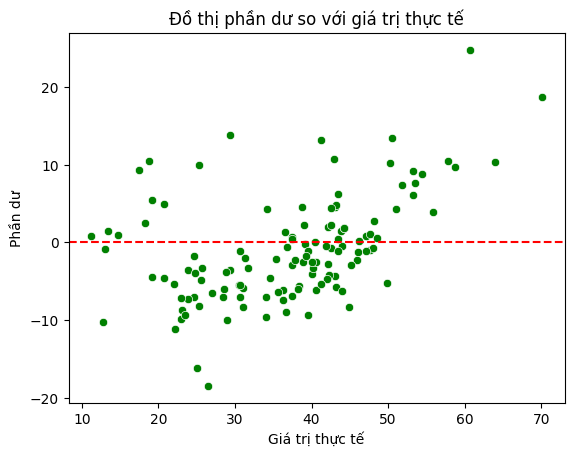

In [ ]:
# Vẽ đồ thị phân tán giữa giá trị thực tế và phần dư
sns.scatterplot(x=y_test, y=test_residuals, color='g')
plt.axhline(y=0, color='r', ls='--')
plt.xlabel('Giá trị thực tế')
plt.ylabel('Phần dư')
plt.title('Đồ thị phần dư so với giá trị thực tế')
plt.show()

In [ ]:
# Trích xuất các hệ số của mô hình
intercept_1 = lin_reg.intercept_
coefficients_1 = lin_reg.coef_

# Hiển thị phương trình hồi quy
features = ['X1 transaction date','X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores',
            'X5 latitude', 'X6 longitude']
equation = f"Y = {intercept_1:.4f}"
for coef, feature in zip(coefficients_1, features):
    equation += f" + ({coef:.4f} * {feature})"

print("Phương trình hồi quy:")
print(equation)

Phương trình hồi quy:
Y = -15119.7380 + (2.7370 * X1 transaction date) + (-13.2411 * X2 house age) + (-21.2341 * X3 distance to the nearest MRT station) + (1.2256 * X4 number of convenience stores) + (246.6449 * X5 latitude) + (74.0661 * X6 longitude)


# Huấn luyện mô hình hồi quy đa thức
Polynomial Regression

<h1> <p style="font-family: "Times New Roman", Times, serif;">Giới thiệu</p></h1>

<b>Hồi quy đa thức</b>

<p>Một mô hình phổ biến trong học máy là sử dụng các mô hình tuyến tính được đào tạo về các hàm phi tuyến của dữ liệu. Cách tiếp cận này duy trì hiệu suất nói chung là nhanh của các phương pháp tuyến tính, đồng thời cho phép chúng phù hợp với phạm vi dữ liệu rộng hơn nhiều.

Ví dụ:<a href="https://www.kaggle.com/mahyamahjoob/real-estate-valuation-using-ographic-regression">hồi quy tuyến tính đơn giản</a> có thể được mở rộng bằng cách xây dựng các đặc điểm đa thức từ các hệ số. Trong trường hợp hồi quy tuyến tính tiêu chuẩn, bạn có thể có một mô hình giống như thế này cho dữ liệu hai chiều:
<H2>y^(w,x)=w0+w1x1+w2x2</H2>
Nếu muốn khớp một hình paraboloid với dữ liệu thay vì một mặt phẳng, chúng ta có thể kết hợp các đặc điểm trong đa thức bậc hai để mô hình trông như thế này:

<H2>y^(w,x)=w0+w1x1+w2x2+w3x1x2+w4x21+w5x22</H2>

Quan sát (đôi khi đáng ngạc nhiên) là đây vẫn là một mô hình tuyến tính: để thấy điều này, hãy tưởng tượng việc tạo một biến mới

<H2>z=[x1,x2,x1x2,x21,x22]</H2>

Với việc dán nhãn lại dữ liệu này, vấn đề của chúng tôi có thể được viết:
    
<H2> y^(w,x)=w0+w1z1+w2z2+w3z3+w4z4+w5z5 </H2>

Chúng tôi thấy rằng hồi quy đa thức thu được thuộc cùng loại mô hình tuyến tính mà chúng tôi đã xem xét ở trên (tức là mô hình tuyến tính theo w) và có thể được giải bằng các kỹ thuật tương tự. Bằng cách xem xét sự phù hợp tuyến tính trong một không gian có chiều cao hơn được xây dựng bằng các hàm cơ bản này, mô hình có khả năng linh hoạt để phù hợp với phạm vi dữ liệu rộng hơn nhiều.</p>
<p>
<h4><b>Nguồn:</b><a href="https://scikit-learn.org/stable/modules/Tuyến_model.html#polynomial-regression-extending-Tuyến tính-models-with-basis-functions ">scikit-learn</a>
</h4></p>


In [ ]:
X = df.drop(['No','Y house price of unit area'],axis=1)
y = df['Y house price of unit area']

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
PF=PolynomialFeatures(degree=2, include_bias=False)
poly_features=PF.fit_transform(X)

In [ ]:
poly_features.shape

(414, 27)

In [ ]:
# huấn luyện mô hình trên tập huấn luyện và sau đó sử dụng tập kiểm tra để đánh giá mô hình.
X_train, X_test, y_train, y_test = train_test_split(
    poly_features, y, test_size=0.3, random_state=101)


In [ ]:
from sklearn.linear_model import LinearRegression
polymodel=LinearRegression()
polymodel.fit(X_train, y_train)

LinearRegression()

<h3>Dự đoán dữ liệu thử nghiệm</h3>

In [ ]:
y_pred=polymodel.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
Y_pred=polymodel.predict(X_test)
print("R2 score of polymodel: {}".format(r2_score(y_test,y_pred)))

R2 score of polymodel: 0.771416577201394


In [ ]:
#giá trị thực tế, giá trị dự đoán và sai số tương ứng.
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred, 'Residuals':(y_test-y_pred) }).head(5)


,Y_Test,Y_Pred,Residuals
176,19.2,16.347940,2.852060
347,11.2,7.878505,3.321495
307,24.7,16.345533,8.354467
299,46.1,42.203633,3.896367
391,31.3,33.171082,-1.871082


In [ ]:
#print(pd.DataFrame({'Y_Test': Y_test,'Y_Pred':Y_pred, 'Residuals':(Y_test-Y_pred) }).to_string())

<h3>Đánh giá mô hình</h3>

In [ ]:
MAE_Poly = metrics.mean_absolute_error(y_test,y_pred)
MSE_Poly = metrics.mean_squared_error(y_test,y_pred)
RMSE_Poly = np.sqrt(MSE_Poly)

pd.DataFrame([MAE_Poly, MSE_Poly, RMSE_Poly],
             index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

,metrics
MAE,4.478386
MSE,30.259031
RMSE,5.500821


Text(0, 0.5, 'Y-Pred')

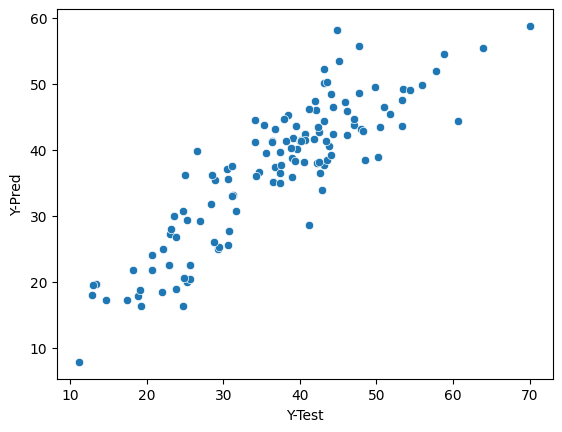

In [ ]:
# biểu đồ phân tán để biểu diễn mối quan hệ giữa giá trị thực tế (y_test) và giá trị dự đoán (y_pred). Cụ thể:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y-Test')
plt.ylabel('Y-Pred')

In [ ]:
#Giá trị dư
residuals=y_test - y_pred


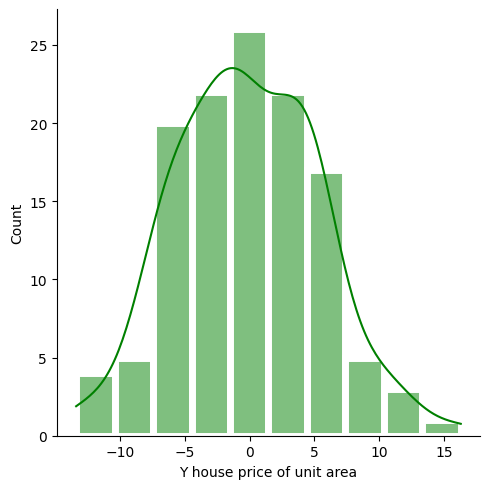

In [ ]:
#kiểm tra và đánh giá phân phối của các phần dư
sns.displot(residuals, bins=10, kde=True ,color='g', edgecolor='white', linewidth=5)


Biểu đồ histogram kết hợp với đường cong mật độ (KDE) được sử dụng để kiểm tra phân phối của các phần dư. Biểu đồ này hiển thị số lượng phần dư nằm trong mỗi khoảng giá trị và đường cong KDE mô tả phân phối xác suất của các phần dư.

 phân tích phân phối của phần dư cho thấy rằng các phần dư có phân phối gần với phân phối chuẩn, điều này cho thấy rằng các giả định của mô hình hồi quy tuyến tính được thỏa mãn và mô hình có hiệu suất tốt.

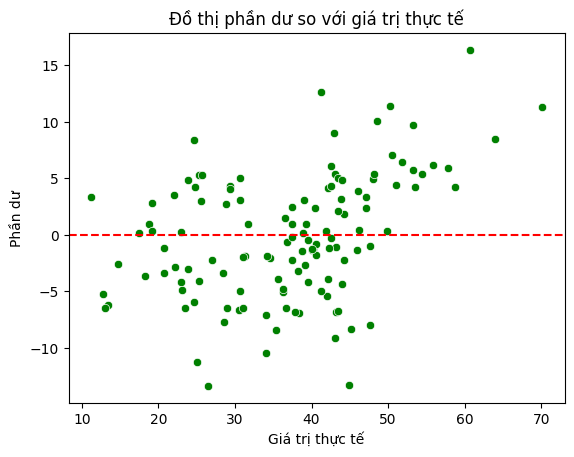

In [ ]:
# Vẽ đồ thị scatter plot giữa giá trị thực tế và phần dư
sns.scatterplot(x=y_test, y=residuals, color='g')
plt.axhline(y=0, color='r', ls='--')
plt.xlabel('Giá trị thực tế')
plt.ylabel('Phần dư')
plt.title('Đồ thị phần dư so với giá trị thực tế')
plt.show()

Đồ thị phân tán giữa giá trị thực tế và phần dư là một công cụ hữu ích để kiểm tra tính chính xác của mô hình hồi quy. Nó giúp đánh giá xem phần dư có phân phối ngẫu nhiên quanh giá trị 0 hay không, từ đó kiểm tra giả định của mô hình hồi quy và phát hiện các điểm bất thường.

In [ ]:
# Chọn các đặc trưng và mục tiêu
X = df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = df['Y house price of unit area']

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Tạo các đặc trưng đa thức
PF = PolynomialFeatures(degree=2, include_bias=False)
X_poly = PF.fit_transform(X_scaled)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=101)

# Huấn luyện mô hình hồi quy đa thức
polymodel = LinearRegression()
polymodel.fit(X_train, y_train)

# Truy xuất hệ số và giao điểm
coefficients = polymodel.coef_
intercept = polymodel.intercept_

# Hiển thị các biến
feature_names = PF.get_feature_names_out(['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'])

# Hiển thị phương trình hồi quy đa thức
equation = f"Y = {intercept:.4f} + "
for coef, feature in zip(coefficients, feature_names):
    equation += f"({coef:.4f} * {feature}) + "

# Loại bỏ dấu "+" cuối cùng
equation = equation.rstrip(" + ")
print("Phương trình hồi quy đa thức là:\n", equation)

Phương trình hồi quy đa thức là:
 Y = -55.3433 + (1.4919 * X1 transaction date) + (-37.0560 * X2 house age) + (89.5931 * X3 distance to the nearest MRT station) + (74.8746 * X4 number of convenience stores) + (101.8644 * X5 latitude) + (141.3042 * X6 longitude) + (4.5632 * X1 transaction date^2) + (-0.3529 * X1 transaction date X2 house age) + (-0.7836 * X1 transaction date X3 distance to the nearest MRT station) + (-1.9644 * X1 transaction date X4 number of convenience stores) + (-16.6411 * X1 transaction date X5 latitude) + (8.8463 * X1 transaction date X6 longitude) + (41.6364 * X2 house age^2) + (6.9902 * X2 house age X3 distance to the nearest MRT station) + (-3.2417 * X2 house age X4 number of convenience stores) + (-27.8541 * X2 house age X5 latitude) + (-0.0041 * X2 house age X6 longitude) + (-8.1235 * X3 distance to the nearest MRT station^2) + (-78.4613 * X3 distance to the nearest MRT station X4 number of convenience stores) + (-125.9188 * X3 distance to the nearest MRT stat

# Ví dụ

In [ ]:
df.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,0.272727,0.730594,0.009513,10,24.98298,121.54024,37.9
1,2,0.272727,0.445205,0.043809,9,24.98034,121.53951,42.2
2,3,1.000000,0.303653,0.083315,5,24.98746,121.54391,47.3
3,4,0.909091,0.303653,0.083315,5,24.98746,121.54391,54.8
4,5,0.181818,0.114155,0.056799,5,24.97937,121.54245,43.1
5,6,0.000000,0.162100,0.332833,3,24.96305,121.51254,32.1
6,7,0.000000,0.787671,0.092827,7,24.97933,121.53642,40.3
7,8,0.818182,0.463470,0.040872,6,24.98042,121.54228,46.7
8,9,0.909091,0.723744,0.849027,1,24.95095,121.48458,18.8
9,10,0.818182,0.408676,0.272219,3,24.96731,121.51486,22.1


#So sánh hồi quy tuyến tính và hồi quy đa thức

In [ ]:
XS_train, XS_test, ys_train, ys_test = train_test_split(X, y, test_size=0.3, random_state=101)
simplemodel=LinearRegression()
simplemodel.fit(XS_train, ys_train)
ys_pred=simplemodel.predict(XS_test)

MAE_simple = metrics.mean_absolute_error(ys_test,ys_pred)
MSE_simple = metrics.mean_squared_error(ys_test,ys_pred)
RMSE_simple = np.sqrt(MSE_simple)

In [ ]:
pd.DataFrame({'Poly Metrics': [MAE_Poly, MSE_Poly, RMSE_Poly], 'Simple Metrics':[MAE_simple, MSE_simple,
                                                                                 RMSE_simple]}, index=['MAE', 'MSE', 'RMSE'])


,Poly Metrics,Simple Metrics
MAE,4.478386,5.334487
MSE,30.259031,46.460281
RMSE,5.500821,6.816178


In [ ]:
# Hồi quy tuyến tính
# Dữ liệu đặc trưng của căn nhà mới
new_house = {
    'X1 transaction date': 2023,
    'X2 house age': 10,
    'X3 distance to the nearest MRT station': 250,
    'X4 number of convenience stores': 5,
    'X5 latitude': 24.972,
    'X6 longitude': 121.541
}

# Tạo DataFrame từ đặc điểm của căn nhà mới
new_house_df = pd.DataFrame([new_house])

# Chọn các đặc trưng để dự đoán
features = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
            'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

# Sử dụng mô hình hồi quy tuyến tính để dự đoán giá bất động sản
predicted_price = lin_reg.predict(new_house_df[features])

# Giá trị dự đoán là giá trị thực tế
predicted_price_log = predicted_price

print(f'Dự đoán giá bất động sản: {predicted_price_log[0]:.2f}')


Dự đoán giá bất động sản: 143.74


In [ ]:
# Hồi quy tuyến tính
# Dữ liệu đặc trưng của căn nhà mới
new_house = {
    'X1 transaction date': 2023,
    'X2 house age': 20,
    'X3 distance to the nearest MRT station': 250,
    'X4 number of convenience stores': 5,
    'X5 latitude': 24.972,
    'X6 longitude': 121.541
}

# Tạo DataFrame từ đặc điểm của căn nhà mới
new_house_df = pd.DataFrame([new_house])

# Chọn các đặc trưng để dự đoán
features = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
            'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

# Sử dụng mô hình hồi quy tuyến tính để dự đoán giá bất động sản
predicted_price = lin_reg.predict(new_house_df[features])

# Giá trị dự đoán là giá trị thực tế
predicted_price_log = predicted_price

print(f'Dự đoán giá bất động sản: {predicted_price_log[0]:.2f}')


Dự đoán giá bất động sản: 11.33


In [ ]:
# Hồi quy tuyến tính
# Dữ liệu đặc trưng của căn nhà mới
new_house = {
    'X1 transaction date': 2023,
    'X2 house age': 10,
    'X3 distance to the nearest MRT station': 255,
    'X4 number of convenience stores': 5,
    'X5 latitude': 24.972,
    'X6 longitude': 121.541
}

# Tạo DataFrame từ đặc điểm của căn nhà mới
new_house_df = pd.DataFrame([new_house])

# Chọn các đặc trưng để dự đoán
features = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
            'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

# Sử dụng mô hình hồi quy tuyến tính để dự đoán giá bất động sản
predicted_price = lin_reg.predict(new_house_df[features])

# Giá trị dự đoán là giá trị thực tế
predicted_price_log = predicted_price

print(f'Dự đoán giá bất động sản: {predicted_price_log[0]:.2f}')


Dự đoán giá bất động sản: 37.57


In [ ]:
# Hồi quy tuyến tính
# Dữ liệu đặc trưng của căn nhà mới
new_house = {
    'X1 transaction date': 2023,
    'X2 house age': 10,
    'X3 distance to the nearest MRT station': 250,
    'X4 number of convenience stores': 10,
    'X5 latitude': 24.972,
    'X6 longitude': 121.541
}

# Tạo DataFrame từ đặc điểm của căn nhà mới
new_house_df = pd.DataFrame([new_house])

# Chọn các đặc trưng để dự đoán
features = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
            'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

# Sử dụng mô hình hồi quy tuyến tính để dự đoán giá bất động sản
predicted_price = lin_reg.predict(new_house_df[features])

# Giá trị dự đoán là giá trị thực tế
predicted_price_log = predicted_price

print(f'Dự đoán giá bất động sản: {predicted_price_log[0]:.2f}')


Dự đoán giá bất động sản: 149.86
